In [ ]:
from skimage import io, transform
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torchvision 
from torchvision import transforms, utils
import PIL
import torchvision.transforms as transforms
from torchvision.datasets import ImageNet
from torch.utils.data import DataLoader
import torch.utils.data as data
import torch
import matplotlib.pyplot as plt
from PIL import Image
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import csv
import torchvision 
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import time
from  torch.autograd import Variable
from torch.optim import lr_scheduler
from sklearn.metrics import confusion_matrix
import itertools
from PIL import Image
from sklearn.metrics import accuracy_score
import random
import cv2
import torchvision.transforms as transforms
from fastai.vision.all import show_image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##We have a dataset of images that change over time (10 input images, 1 output image)
!unzip "/content/drive/MyDrive project dataset/train.zip" -d "/content/sample_data/train/"

Streaming output truncated to the last 5000 lines.
 extracting: /content/sample_data/train/train/image1435.png  
 extracting: /content/sample_data/train/train/image4634.png  
 extracting: /content/sample_data/train/train/image4864.png  
 extracting: /content/sample_data/train/train/image2618.png  
 extracting: /content/sample_data/train/train/image619.png  
 extracting: /content/sample_data/train/train/image2841.png  
 extracting: /content/sample_data/train/train/image2995.png  
 extracting: /content/sample_data/train/train/image5166.png  
 extracting: /content/sample_data/train/train/image3166.png  
 extracting: /content/sample_data/train/train/image2535.png  
 extracting: /content/sample_data/train/train/image1839.png  
 extracting: /content/sample_data/train/train/image3535.png  
 extracting: /content/sample_data/train/train/image604.png  
 extracting: /content/sample_data/train/train/image890.png  
 extracting: /content/sample_data/train/train/image2409.png  
 extracting: /content/

In [ ]:
class LinearRegression(torch.nn.Module):

   def __init__(self): 
      super(LinearRegression, self).__init__() 
      self.linear = torch.nn.Linear(128,128)
      self.width=128
      
      self.w0 = nn.Conv2d(self.width, self.width, 1)
      self.w1 = nn.Conv2d(self.width, self.width, 1)
      self.w2 = nn.Conv2d(self.width, self.width, 1)
      self.w3 = nn.Conv2d(self.width, self.width, 1)
      self.bn0 = torch.nn.BatchNorm2d(self.width)
      self.bn1 = torch.nn.BatchNorm2d(self.width)
      self.bn2 = torch.nn.BatchNorm2d(self.width)
      self.bn3 = torch.nn.BatchNorm2d(self.width)


      #self.fc1 = nn.Linear(128, 128)
      #self.fc2 = nn.Linear(128, 128)
      
   def forward(self, x): 
     predict_y = self.linear(x) 
     return predict_y 

In [ ]:
linear_model = LinearRegression()

In [ ]:
define_criterion = torch.nn.MSELoss(size_average=None, reduce=None, reduction='mean')

SGD_optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01,weight_decay=0)

In [ ]:
path="/content/sample_data/train/train"
sum_tensors=torch.ones(64, 128)

nb_test_images=len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))]) 
k=1
#nb_test_images=5000
for epoch in range(100):
  sum_tensors=torch.ones(64,128)
 
  k=1
  while k<= nb_test_images:
    #sum_tensors=torch.ones(3, 64, 128)
    for i in range(10):
      file_path=path+"/image"+str(k)+".png"
    
      
    
      image = cv2.imread(os.path.join(file_path))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      #image.reshape(192,128)
      image = Image.open(file_path)
      
      
      #image = image.resize((64, 128))
     
      transform = transforms.Compose([
      transforms.ToTensor()
])

      tensor = transform(image)
      #tensor=image
      sum_tensors=sum_tensors*tensor
      k+=1

    file_path=path+"/image"+str(k)+".png"
    image1 = cv2.imread(os.path.join(file_path))
    

# Convert BGR image to RGB image
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image1 = Image.open(file_path)
    #image1.reshape(3,64,128)
    #image1 = image.resize((64, 128))
  
# Define a transform to convert
# the image to torch tensor
    transform = transforms.Compose([
    transforms.ToTensor()
])
    tensor_target = transform(image1)
    predict_y = linear_model(sum_tensors) 
    loss = define_criterion(predict_y, tensor_target) 
  
    SGD_optimizer.zero_grad() 
    loss.backward() 
    #torch.nn.utils.clip_grad_norm_(linear_model.parameters(), 5)
    SGD_optimizer.step()
    k+=1
    sum_tensors=torch.ones(64,128)
           
      
  print('epoch {}, loss function {}'.format(epoch, loss.item()))

epoch 0, loss function 0.22432191669940948
epoch 1, loss function 0.2102036476135254
epoch 2, loss function 0.20011292397975922
epoch 3, loss function 0.1923791766166687
epoch 4, loss function 0.18632963299751282
epoch 5, loss function 0.18151602149009705
epoch 6, loss function 0.17762146890163422
epoch 7, loss function 0.17441904544830322
epoch 8, loss function 0.17174480855464935
epoch 9, loss function 0.16947892308235168
epoch 10, loss function 0.1675330102443695
epoch 11, loss function 0.16584105789661407
epoch 12, loss function 0.16435320675373077
epoch 13, loss function 0.1630314141511917
epoch 14, loss function 0.16184622049331665
epoch 15, loss function 0.1607745885848999
epoch 16, loss function 0.15979835391044617
epoch 17, loss function 0.1589028388261795
epoch 18, loss function 0.15807636082172394
epoch 19, loss function 0.15730923414230347
epoch 20, loss function 0.15659356117248535
epoch 21, loss function 0.15592268109321594
epoch 22, loss function 0.15529105067253113
epoc

KeyboardInterrupt: ignored

In [ ]:
!unzip "/content/drive/MyDrive/fourier project dataset/test.zip" -d "/content/sample_data/test"

Archive:  /content/drive/MyDrive/fourier project dataset/test.zip
   creating: /content/sample_data/test/test/
 extracting: /content/sample_data/test/test/image36.png  
 extracting: /content/sample_data/test/test/image73.png  
 extracting: /content/sample_data/test/test/image48.png  
 extracting: /content/sample_data/test/test/image62.png  
 extracting: /content/sample_data/test/test/image33.png  
 extracting: /content/sample_data/test/test/image40.png  
 extracting: /content/sample_data/test/test/image68.png  
 extracting: /content/sample_data/test/test/image88.png  
 extracting: /content/sample_data/test/test/image31.png  
 extracting: /content/sample_data/test/test/image35.png  
 extracting: /content/sample_data/test/test/image80.png  
 extracting: /content/sample_data/test/test/image4.png  
 extracting: /content/sample_data/test/test/image79.png  
 extracting: /content/sample_data/test/test/image77.png  
 extracting: /content/sample_data/test/test/image85.png  
 extracting: /conten

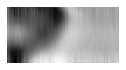

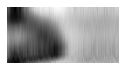

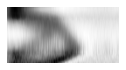

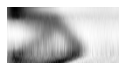

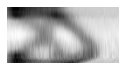

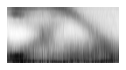

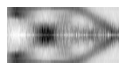

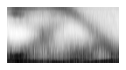

In [ ]:
##test files

sum_tensors=torch.ones(64, 128)
path="/content/sample_data/test/test/"
#Number of images in test set
nb_test_images=len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))]) 

k=1
while k<= nb_test_images:

#for file in (os.listdir(path)):
  for i in range(1,11):
    
  
    file_path=path+"/image"+str(k)+".png"
    
      
    
    image = cv2.imread(os.path.join(file_path))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = Image.open(file_path)
      
      #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #image = image.resize((64, 128))
     
    transform = transforms.Compose([
    transforms.ToTensor()
])
    tensor = transform(image)
    sum_tensors=sum_tensors*tensor
    k+=1

  
  prediction = linear_model(sum_tensors)
  prediction.permute(1,2,0)
  show_image(prediction,cmap='Greys_r')
  #prediction=prediction.detach().numpy()
  #plt.imshow(prediction.permute(1, 2, 0) )
  k+=1
  sum_tensors=torch.ones(64, 128)



